Conteggio per prima lettera di Cabin (ponti):
Cabin_first_letter
A    22
B    65
C    94
D    46
E    41
F    21
G     5
T     1
Name: count, dtype: int64


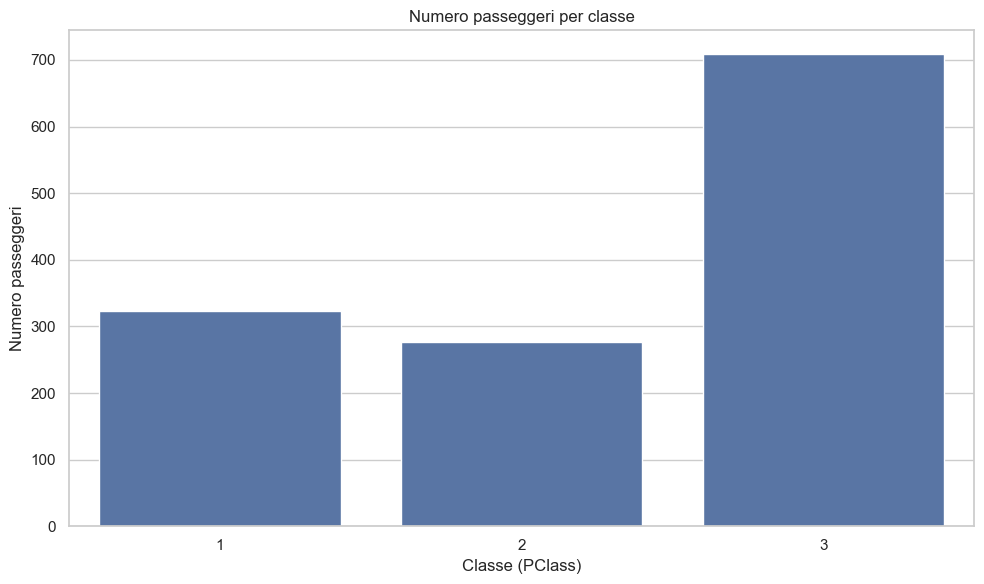

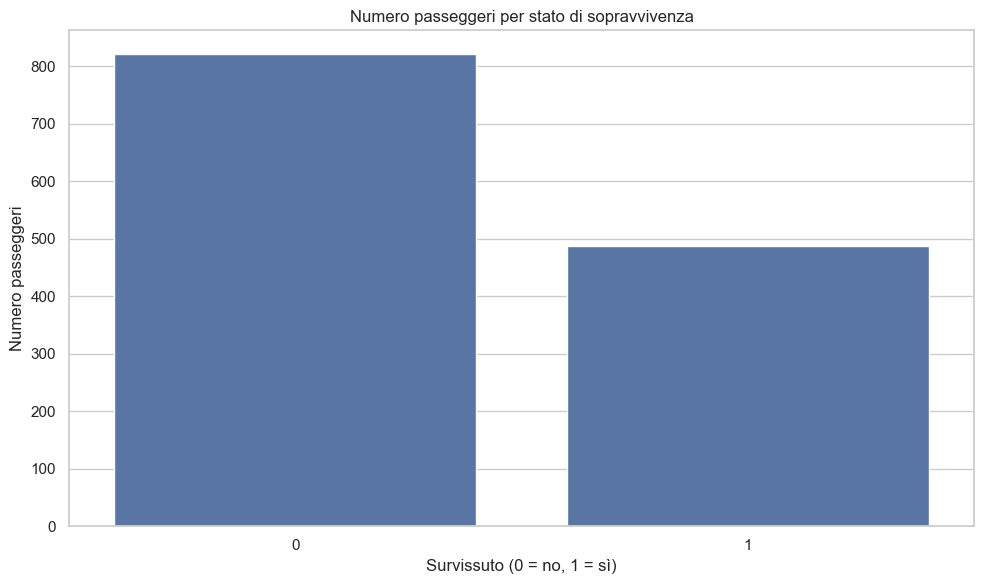

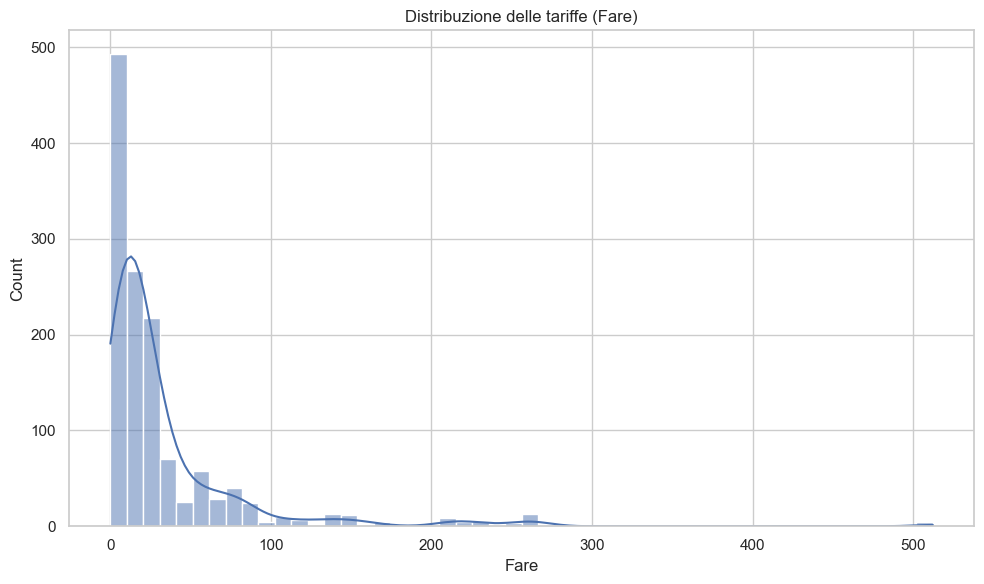

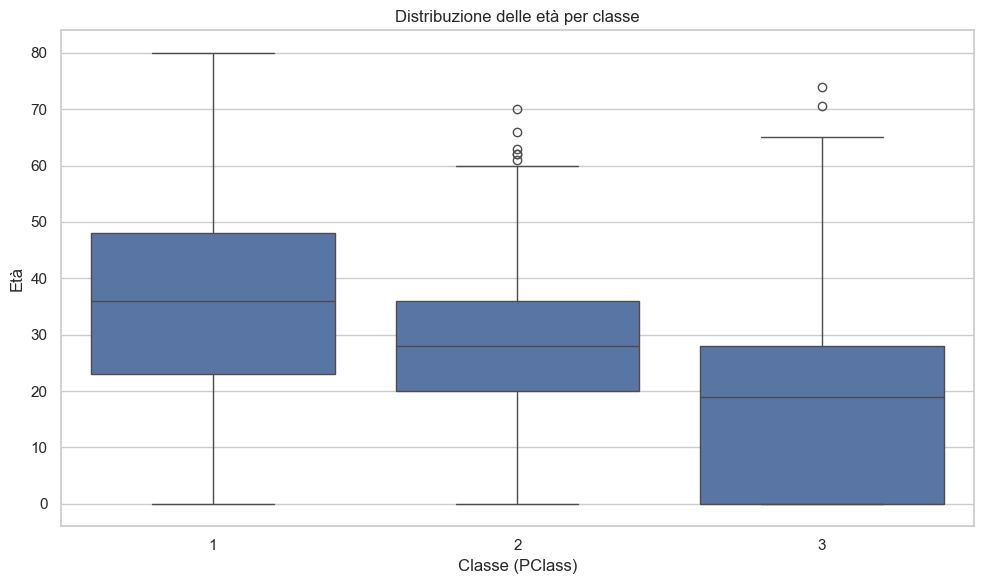

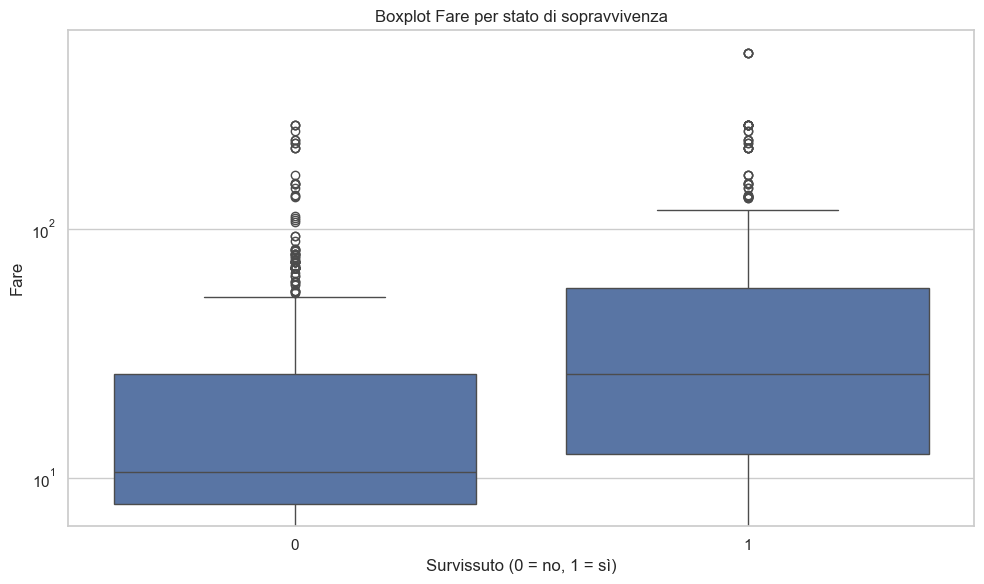


Statistiche riassuntive Fare:
count    1309.000000
mean       33.270825
std        51.747086
min         0.000000
25%         7.900000
50%        14.450000
75%        31.280000
max       512.330000
Name: Fare, dtype: float64

Conteggio passeggeri per PClass:
PClass
1    323
2    277
3    709
Name: count, dtype: int64

Conteggio passeggeri per Survived:
Survived
0    821
1    488
Name: count, dtype: int64


In [11]:
#pg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

df = pd.read_csv("C:/Users/matte/Downloads/Dataset_Lezioni/dataset_lez6/titanic.csv")

df.columns = df.columns.str.strip()

df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['PClass'] = pd.to_numeric(df['PClass'], errors='coerce')
df['Survived'] = pd.to_numeric(df['Survived'], errors='coerce')

#Req.1
df['Cabin_first'] = df['Cabin'].astype(str).str.strip().replace({'nan': None})
df.loc[df['Cabin_first'].isna(), 'Cabin_first'] = None
df['Cabin_first_letter'] = df['Cabin_first'].dropna().str[0]
cabin_counts = df['Cabin_first_letter'].value_counts(dropna=True).sort_index()

print("Conteggio per prima lettera di Cabin (ponti):")
print(cabin_counts)

#Req.2
pclass_counts = df['PClass'].value_counts().sort_index()
plt.figure()
sns.barplot(x=pclass_counts.index.astype(int), y=pclass_counts.values)
plt.xlabel("Classe (PClass)")
plt.ylabel("Numero passeggeri")
plt.title("Numero passeggeri per classe")
plt.tight_layout()
plt.savefig("pclass_counts.png")
plt.show()

#Req.3
survived_counts = df['Survived'].value_counts().sort_index()
plt.figure()
sns.barplot(x=survived_counts.index.astype(int), y=survived_counts.values)
plt.xlabel("Survissuto (0 = no, 1 = sì)")
plt.ylabel("Numero passeggeri")
plt.title("Numero passeggeri per stato di sopravvivenza")
plt.tight_layout()
plt.savefig("survived_counts.png")
plt.show()

#Req.4
plt.figure()
# rimuovi NaN
fare_data = df['Fare'].dropna()
sns.histplot(fare_data, bins=50, kde=True)
plt.xlabel("Fare")
plt.title("Distribuzione delle tariffe (Fare)")
plt.tight_layout()
plt.savefig("fare_distribution.png")
plt.show()

#Req.5
plt.figure()
sns.boxplot(x='PClass', y='Age', data=df.dropna(subset=['Age','PClass']))
plt.xlabel("Classe (PClass)")
plt.ylabel("Età")
plt.title("Distribuzione delle età per classe")
plt.tight_layout()
plt.savefig("age_by_pclass_boxplot.png")
plt.show()

#Req.6
plt.figure()
sns.boxplot(x='Survived', y='Fare', data=df.dropna(subset=['Fare','Survived']))
plt.xlabel("Survissuto (0 = no, 1 = sì)")
plt.ylabel("Fare")
plt.title("Boxplot Fare per stato di sopravvivenza")
plt.yscale('log')  # opzionale: scala log per evidenziare la coda destra
plt.tight_layout()
plt.savefig("fare_by_survived_boxplot.png")
plt.show()

print("\nStatistiche riassuntive Fare:")
print(fare_data.describe())

print("\nConteggio passeggeri per PClass:")
print(pclass_counts)

print("\nConteggio passeggeri per Survived:")
print(survived_counts)


Righe caricate: 2306
Intervallo date nel dataset: 2007-01-03 → 2016-03-01


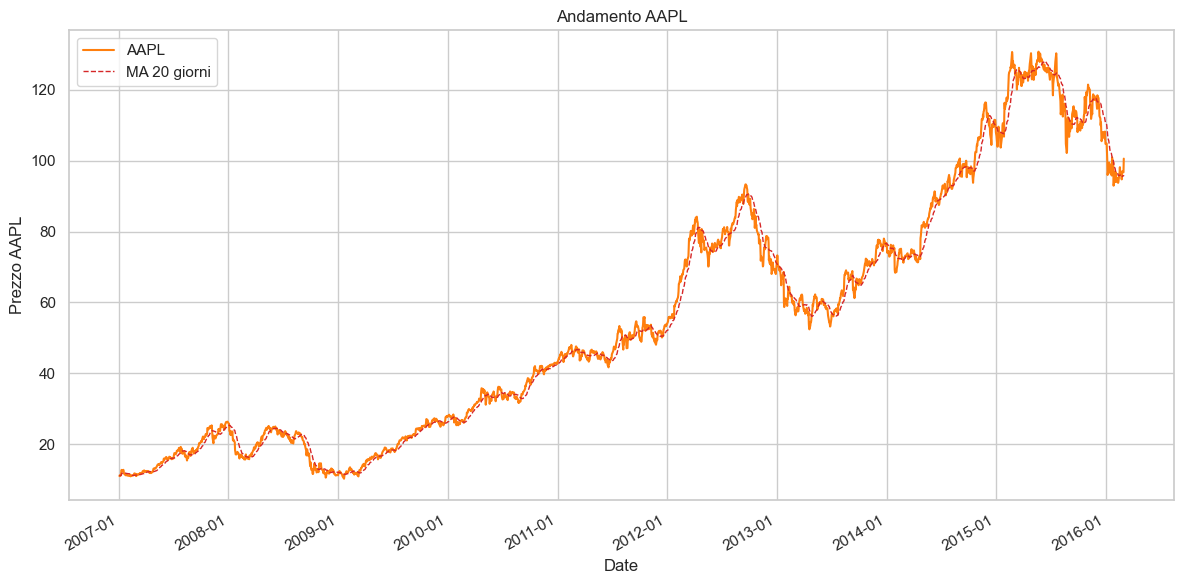

<Figure size 1200x600 with 0 Axes>

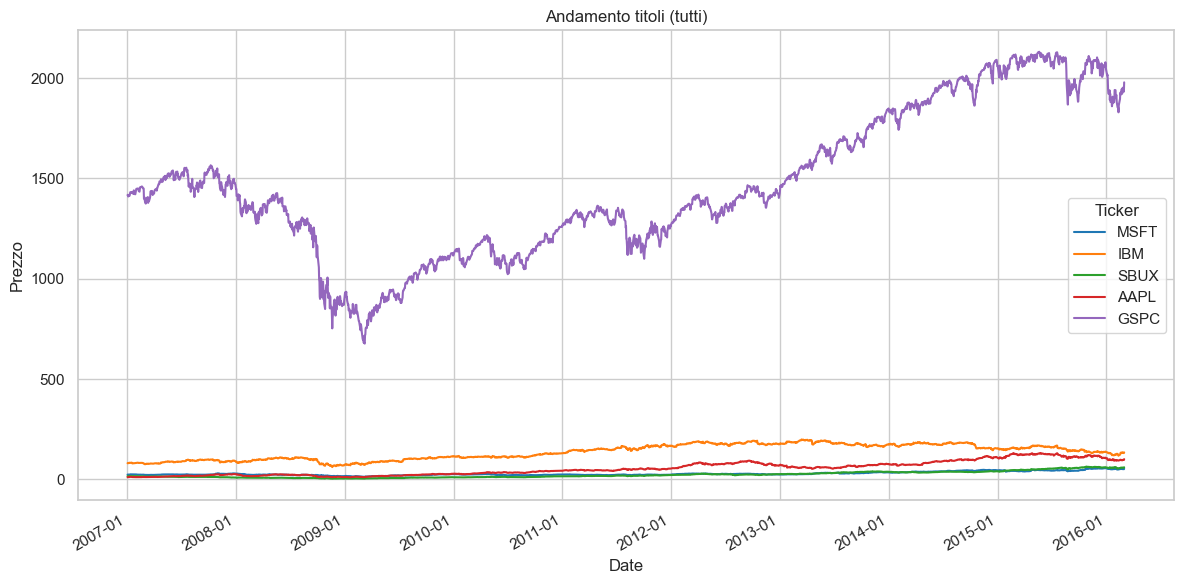

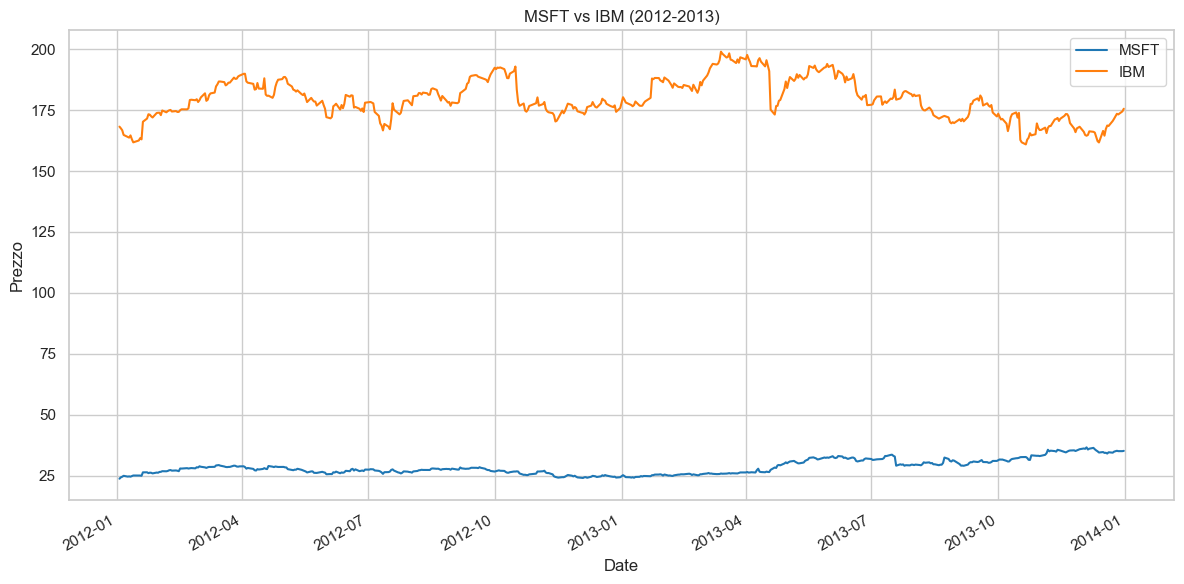

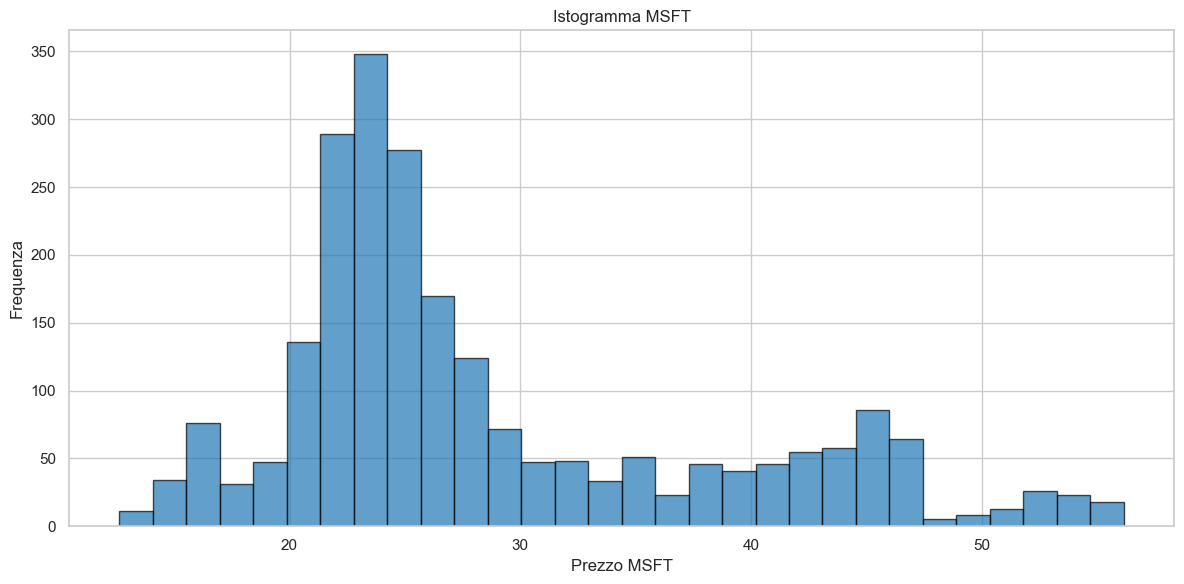

Bin MSFT più frequente: 22.78 – 24.23 con 348 occorrenze


In [4]:
#pg3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

# Impostazioni grafiche globali
sns.set_style('whitegrid')
sns.set_palette('tab10')
plt.rcParams["figure.figsize"] = (12,6)

# 1) Caricamento e pulizia minima
df = pd.read_csv("C:/Users/matte/Downloads/stockdata.csv", header=0)

# Rinomina colonne se necessario (rimuove eventuali spazi/quote)
df.columns = [c.strip().strip('"') for c in df.columns]

# Converti Date in datetime e impostala come indice
df['Date'] = pd.to_datetime(df['Date'].str.strip().str.replace('"',''))
df = df.set_index('Date').sort_index()

# Converti colonne numeriche (rimuove eventuali virgolette)
for col in df.columns:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace('"',''), errors='coerce')

# Stampa informazioni base
n_rows = len(df)
date_min = df.index.min()
date_max = df.index.max()
print(f"Righe caricate: {n_rows}")
print(f"Intervallo date nel dataset: {date_min.date()} → {date_max.date()}")

# Funzione di formattazione asse x per date
def format_xaxis(ax):
    ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

# 2) Grafico time series della colonna AAPL con media mobile 20 giorni
aapl = df['AAPL'].dropna()
plt.figure()
ax = aapl.plot(linewidth=1.5, label='AAPL', color='tab:orange')
# Calcola media mobile a 20 giorni
ma20 = aapl.rolling(window=20, min_periods=1).mean()
ma20.plot(ax=ax, linewidth=1, linestyle='--', label='MA 20 giorni', color='tab:red')
ax.set_title("Andamento AAPL")
ax.set_xlabel("Date")
ax.set_ylabel("Prezzo AAPL")
ax.legend()
format_xaxis(ax)
plt.tight_layout()
plt.savefig("aapl_timeseries.png")
plt.show()

# 3) Grafico time series di tutte le azioni (MSFT, IBM, SBUX, AAPL, GSPC)
cols_all = [c for c in ['MSFT','IBM','SBUX','AAPL','GSPC'] if c in df.columns]
plt.figure()
ax = df[cols_all].dropna(how='all').plot(linewidth=1.5)
ax.set_title("Andamento titoli (tutti)")
ax.set_xlabel("Date")
ax.set_ylabel("Prezzo")
ax.legend(title='Ticker')
format_xaxis(ax)
plt.tight_layout()
plt.savefig("all_stocks_timeseries.png")
plt.show()

# 4) MSFT e IBM negli anni 2012 e 2013
start = '2012-01-01'
end = '2013-12-31'
mask_2012_2013 = (df.index >= start) & (df.index <= end)
df_2012_2013 = df.loc[mask_2012_2013, ['MSFT','IBM']].dropna(how='all')

if df_2012_2013.empty:
    print("Attenzione: non ci sono dati per gli anni 2012-2013 per MSFT/IBM nel dataset.")
else:
    plt.figure()
    ax = df_2012_2013['MSFT'].plot(linewidth=1.5, label='MSFT')
    df_2012_2013['IBM'].plot(ax=ax, linewidth=1.5, label='IBM')
    ax.set_title("MSFT vs IBM (2012-2013)")
    ax.set_xlabel("Date")
    ax.set_ylabel("Prezzo")
    ax.legend()
    format_xaxis(ax)
    plt.tight_layout()
    plt.savefig("msft_ibm_2012_2013.png")
    plt.show()

# 5) Istogramma dei valori di MSFT con 30 bin e bin più frequente
msft = df['MSFT'].dropna()
if msft.empty:
    print("Attenzione: colonna MSFT vuota o non presente.")
else:
    plt.figure()
    counts, bins, patches = plt.hist(msft, bins=30, edgecolor='black', alpha=0.7)
    plt.title("Istogramma MSFT")
    plt.xlabel("Prezzo MSFT")
    plt.ylabel("Frequenza")
    plt.tight_layout()
    plt.savefig("msft_histogram.png")
    plt.show()

    # Calcolo del bin più frequente
    max_idx = np.argmax(counts)
    bin_left = bins[max_idx]
    bin_right = bins[max_idx+1]
    max_count = int(counts[max_idx])
    print(f"Bin MSFT più frequente: {bin_left:.2f} – {bin_right:.2f} con {max_count} occorrenze")

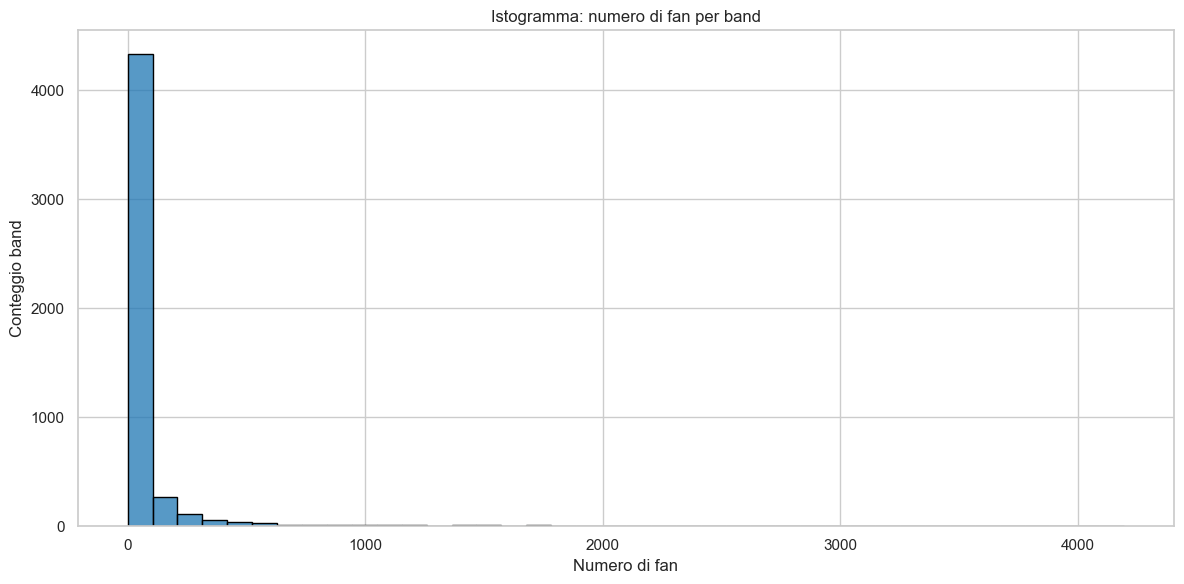

Statistiche rapide su 'fans':
count    5000.0
mean       87.8
std       296.1
min         0.0
25%         4.0
50%        12.0
75%        42.0
max      4195.0
Name: fans, dtype: float64


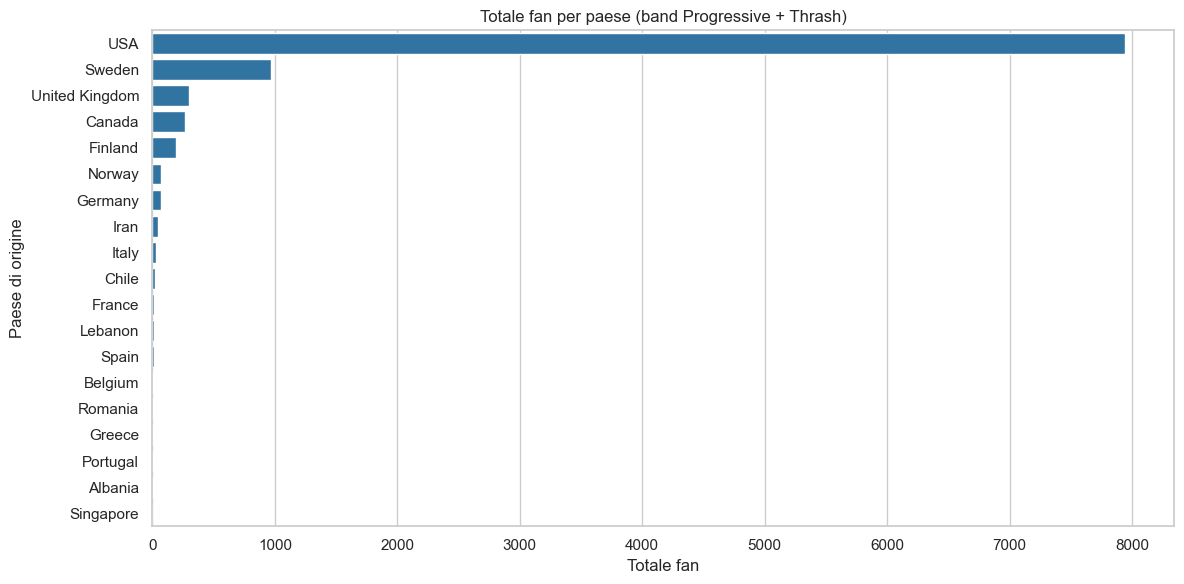


Aggregazione fans per paese (band Progressive + Thrash):
origin_clean
USA               7946
Sweden             970
United Kingdom     299
Canada             267
Finland            195
Norway              69
Germany             67
Iran                49
Italy               32
Chile               19
France              14
Lebanon             10
Spain               10
Belgium              8
Romania              6
Greece               4
Portugal             4
Albania              2
Singapore            0
Name: fans, dtype: int64


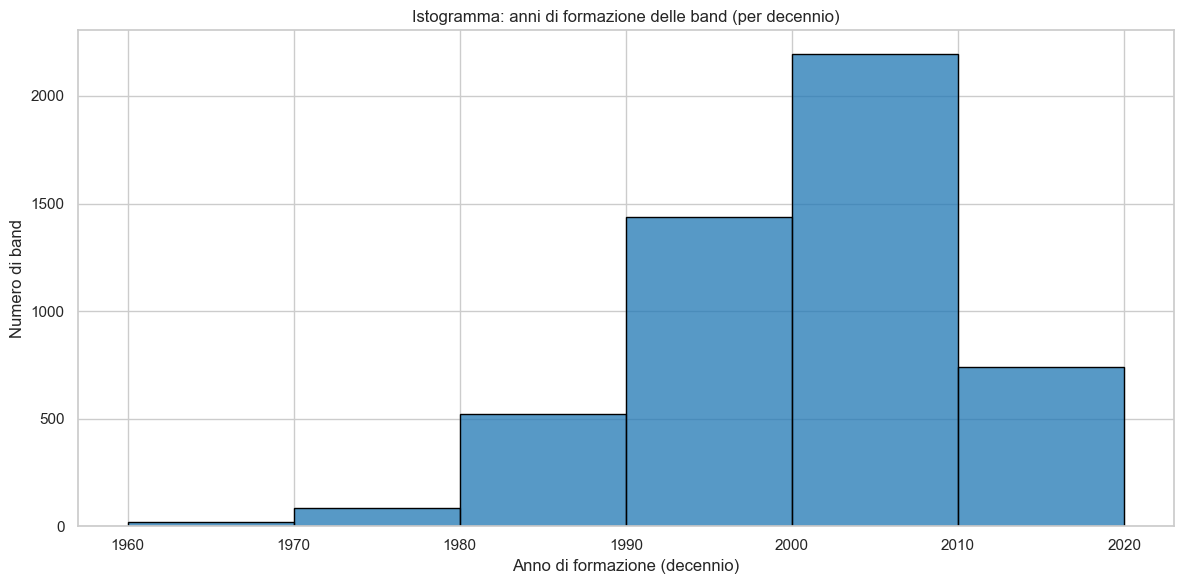


Anni di formazione: min, max, mediana
1964 2016 2002


In [8]:
#pg4

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set_palette('tab10')
plt.rcParams["figure.figsize"] = (12,6)

df = pd.read_csv("C:/Users/matte/Downloads/Dataset_Lezioni/dataset_es7/metal_bands_2017.csv", encoding="latin-1", index_col=0)
#ho dovuto mettere encoding in quanto altrimenti andava in errore

df.columns = [c.strip() for c in df.columns]
df['band_name'] = df['band_name'].astype(str).str.strip().str.replace('"','')

df['fans'] = pd.to_numeric(df['fans'], errors='coerce')
df['formed'] = pd.to_numeric(df['formed'], errors='coerce')

df['origin_clean'] = df['origin'].astype(str).str.split(',').str[0].str.strip()

styles = df.loc[:, "style"].astype(str).str.lower()

#Req.1
plt.figure()
fans = df['fans'].dropna()
sns.histplot(fans, bins=40, kde=False, edgecolor='black')
plt.title("Istogramma: numero di fan per band")
plt.xlabel("Numero di fan")
plt.ylabel("Conteggio band")
plt.tight_layout()
plt.savefig("hist_fans.png")
plt.show()

print("Statistiche rapide su 'fans':")
print(fans.describe().round(1))

#Req.2
mask_prog_thrash = styles.str.contains('progressive', na=False) & styles.str.contains('thrash', na=False)
df_prog_thrash = df.loc[mask_prog_thrash].copy()

if df_prog_thrash.empty:
    print("Nessuna band congiuntamente 'Progressive' e 'Thrash' trovata nel dataset.")
else:
    agg_by_origin = df_prog_thrash.groupby('origin_clean')['fans'].sum().sort_values(ascending=False)
    plt.figure()
    sns.barplot(x=agg_by_origin.values, y=agg_by_origin.index, orient='h')
    plt.title("Totale fan per paese (band Progressive + Thrash)")
    plt.xlabel("Totale fan")
    plt.ylabel("Paese di origine")
    plt.tight_layout()
    plt.savefig("barprogthrash_by_origin.png")
    plt.show()

    print("\nAggregazione fans per paese (band Progressive + Thrash):")
    print(agg_by_origin)

#Req.3
formed_years = df['formed'].dropna().astype(int)

plt.figure()
min_year = formed_years.min()
max_year = formed_years.max()
bins = np.arange((min_year // 10) * 10, ((max_year // 10) + 1) * 10 + 1, 10)
sns.histplot(formed_years, bins=bins, kde=False, edgecolor='black')
plt.title("Istogramma: anni di formazione delle band (per decennio)")
plt.xlabel("Anno di formazione (decennio)")
plt.ylabel("Numero di band")
plt.xticks(bins)
plt.tight_layout()
plt.savefig("hist_formed_decade.png")
plt.show()

# Statistiche e osservazioni
print("\nAnni di formazione: min, max, mediana")
print(min_year, max_year, int(formed_years.median()))

Totale voti per candidato:
Coderre     149467
Joly        123062
Bergeron    118637
dtype: int64


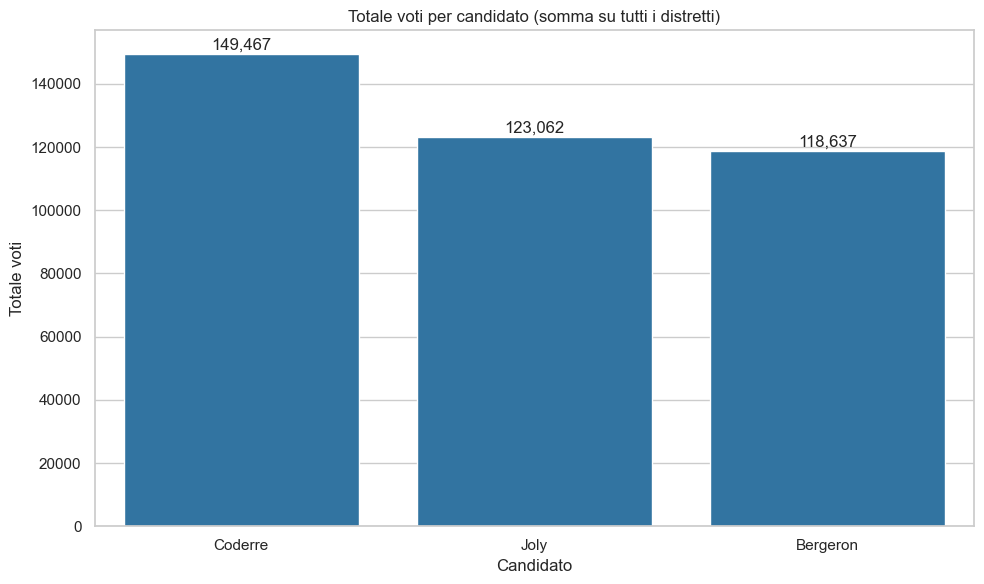

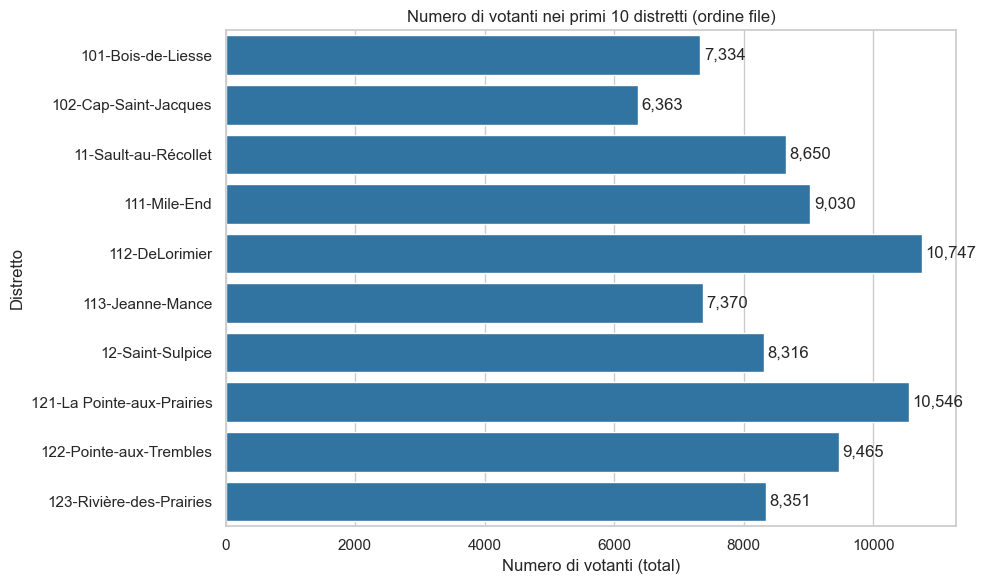

In [10]:
#pg5
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("tab10")
plt.rcParams["figure.figsize"] = (10,6)

df = pd.read_csv("C:/Users/matte/Downloads/Dataset_Lezioni/dataset_es7/election.csv", encoding="utf-8")

df.columns = [c.strip() for c in df.columns]

candidates = ["Coderre", "Bergeron", "Joly"]
totals = df[candidates].sum().sort_values(ascending=False)

print("Totale voti per candidato:")
print(totals)

#Req.1
plt.figure()
ax = sns.barplot(x=totals.index, y=totals.values)
ax.set_title("Totale voti per candidato (somma su tutti i distretti)")
ax.set_xlabel("Candidato")
ax.set_ylabel("Totale voti")
# Mostra i valori sopra le barre
for i, v in enumerate(totals.values):
    ax.text(i, v + max(totals.values)*0.01, f"{int(v):,}", ha='center')
plt.tight_layout()
plt.savefig("totale_voti_per_candidato.png")
plt.show()

# Req.2
first10 = df.iloc[:10].copy()
first10['total'] = pd.to_numeric(first10['total'], errors='coerce')

plt.figure()
ax2 = sns.barplot(x='total', y='district', data=first10, orient='h')
ax2.set_title("Numero di votanti nei primi 10 distretti (ordine file)")
ax2.set_xlabel("Numero di votanti (total)")
ax2.set_ylabel("Distretto")
for p in ax2.patches:
    width = p.get_width()
    ax2.text(width + max(first10['total'])*0.005, p.get_y() + p.get_height()/2,
             f"{int(width):,}", va='center')
plt.tight_layout()
plt.savefig("votanti_primi_10_distretti.png")

Letto con encoding utf-8
Colonne trovate: ['Created Date', 'Closed Date', 'Location Type', 'Incident Zip', 'City', 'Borough', 'Latitude', 'Longitude']


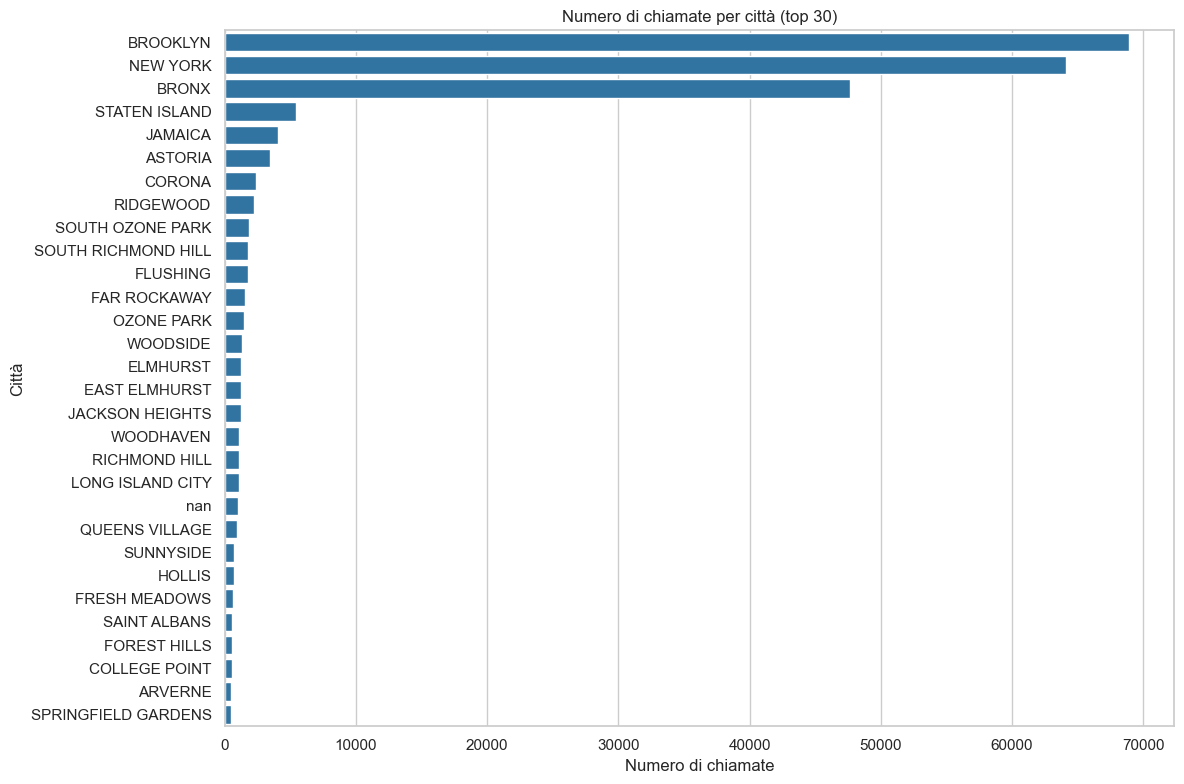


Rettangolo lat/lon del dataset:
Latitude:  min = 40.498819681472185, max = 40.91217840308113
Longitude: min = -74.25127710072611, max = -73.70230256557906

Numero segnalazioni per case private (keyword-based): 146642

Colonna 'Neighborhood' non trovata; impossibile creare il countplot dei quartieri.

=== Riepilogo calcoli ===
Totale città distinte: 49; top 5 città:
City
BROOKLYN         68909
NEW YORK         64112
BRONX            47673
STATEN ISLAND     5411
JAMAICA           4041
Bounding box lat/lon: lat [40.498819681472185, 40.91217840308113], lon [-74.25127710072611, -73.70230256557906]
Segnalazioni per case private (keyword-based): 146642


In [13]:
#pg6

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style('whitegrid')
sns.set_palette('tab10')
plt.rcParams["figure.figsize"] = (12,6)

CSV_PATH = "C:/Users/matte/Downloads/Dataset_Lezioni/dataset_es7/party_in_nyc.csv"

CITY_COL = 'City'
LAT_COL = 'Latitude'
LON_COL = 'Longitude'
LOC_TYPE_COL = 'Location Type'
NEIGH_COL = 'Neighborhood'

if not os.path.exists(CSV_PATH):
    raise FileNotFoundError(f"File non trovato: {CSV_PATH}")

try:
    df = pd.read_csv(CSV_PATH, encoding='utf-8', low_memory=False)
    print("Letto con encoding utf-8")
except UnicodeDecodeError:
    df = pd.read_csv(CSV_PATH, encoding='latin-1', low_memory=False)
    print("Letto con encoding latin-1 (fallback)")

df.columns = [c.strip() for c in df.columns]

print("Colonne trovate:", df.columns.tolist())

if LAT_COL in df.columns:
    df[LAT_COL] = pd.to_numeric(df[LAT_COL], errors='coerce')
if LON_COL in df.columns:
    df[LON_COL] = pd.to_numeric(df[LON_COL], errors='coerce')

if CITY_COL in df.columns:
    df[CITY_COL] = df[CITY_COL].astype(str).str.strip().fillna('Unknown')
if NEIGH_COL in df.columns:
    df[NEIGH_COL] = df[NEIGH_COL].astype(str).str.strip().fillna('Unknown')
if LOC_TYPE_COL in df.columns:
    df[LOC_TYPE_COL] = df[LOC_TYPE_COL].astype(str).str.strip().fillna('Unknown')

#Req1 
if CITY_COL in df.columns:
    city_counts = df[CITY_COL].value_counts().sort_values(ascending=False)
    TOP_N = 30  # mostra top N per leggibilità
    top_cities = city_counts.head(TOP_N)

    plt.figure(figsize=(12,8))
    sns.barplot(x=top_cities.values, y=top_cities.index)
    plt.title(f"Numero di chiamate per città (top {TOP_N})")
    plt.xlabel("Numero di chiamate")
    plt.ylabel("Città")
    plt.tight_layout()
    plt.savefig("calls_per_city_topN.png")
    plt.show()
else:
    print(f"Colonna '{CITY_COL}' non trovata; impossibile creare il grafico per città.")

# Req2
if LAT_COL in df.columns and LON_COL in df.columns:
    min_lat = df[LAT_COL].min()
    max_lat = df[LAT_COL].max()
    min_lon = df[LON_COL].min()
    max_lon = df[LON_COL].max()
    print("\nRettangolo lat/lon del dataset:")
    print(f"Latitude:  min = {min_lat}, max = {max_lat}")
    print(f"Longitude: min = {min_lon}, max = {max_lon}")
else:
    print("\nColonne lat/lon non trovate; impossibile calcolare il rettangolo.")

# Req3
private_count = None
if LOC_TYPE_COL in df.columns:
    loc_lower = df[LOC_TYPE_COL].str.lower().fillna('')
    # Cerca parole chiave comuni per "case private"
    mask_private = loc_lower.str.contains('private') | loc_lower.str.contains('residence') | \
                   loc_lower.str.contains('house') | loc_lower.str.contains('home') | \
                   loc_lower.str.contains('private residence')
    private_count = int(mask_private.sum())
    print(f"\nNumero segnalazioni per case private (keyword-based): {private_count}")
else:
    print(f"\nColonna '{LOC_TYPE_COL}' non trovata; impossibile contare case private.")

#Req4
if NEIGH_COL in df.columns:
    TOP_M = 20
    top_neigh = df[NEIGH_COL].value_counts().nlargest(TOP_M).index.tolist()
    df_top_neigh = df[df[NEIGH_COL].isin(top_neigh)].copy()

    plt.figure(figsize=(12,8))
    ax = sns.countplot(y=NEIGH_COL, data=df_top_neigh, order=top_neigh)
    ax.set_title(f"Conteggio segnalazioni per quartiere (top {TOP_M})")
    ax.set_xlabel("Conteggio segnalazioni")
    ax.set_ylabel("Quartiere")
    plt.tight_layout()
    plt.savefig("count_neighborhoods.png")
    plt.show()

    if LOC_TYPE_COL in df_top_neigh.columns:
        plt.figure(figsize=(12,10))
        ax2 = sns.countplot(y=NEIGH_COL, hue=LOC_TYPE_COL, data=df_top_neigh, order=top_neigh)
        ax2.set_title(f"Conteggio segnalazioni per quartiere (top {TOP_M}) con hue='{LOC_TYPE_COL}'")
        ax2.set_xlabel("Conteggio segnalazioni")
        ax2.set_ylabel("Quartiere")
        plt.legend(title=LOC_TYPE_COL, bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.savefig("count_neighborhoods_hue_locationtype.png")
        plt.show()
        print("\nNota: aggiungendo hue='Location Type' le barre vengono suddivise per tipo di luogo,")
        print("mostrando la composizione delle segnalazioni in ciascun quartiere.")
    else:
        print(f"\nColonna '{LOC_TYPE_COL}' non trovata; salto il plot con hue.")
else:
    print(f"\nColonna '{NEIGH_COL}' non trovata; impossibile creare il countplot dei quartieri.")

print("\n=== Riepilogo calcoli ===")
if CITY_COL in df.columns:
    print(f"Totale città distinte: {len(city_counts)}; top 5 città:\n{city_counts.head(5).to_string()}")
if min_lat is not None:
    print(f"Bounding box lat/lon: lat [{min_lat}, {max_lat}], lon [{min_lon}, {max_lon}]")
if private_count is not None:
    print(f"Segnalazioni per case private (keyword-based): {private_count}")
if NEIGH_COL in df.columns:
    print(f"Top 5 quartieri per segnalazioni:\n{df[NEIGH_COL].value_counts().head(5).to_string()}")
